## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Practice Skills
Binary classification
Python and R basics

** Dictionary ** <br/>
PassengerIdtype should be integers <br/>
SurvivedSurvived or Not<br/>
PclassClass of Travel<br/>
NameName of Passenger<br/>
SexGender<br/>
AgeAge of Passengers<br/>
SibSpNumber of Sibling/Spouse aboard<br/>
ParchNumber of Parent/Child aboard<br/>
Ticket<br/>
Fare<br/>
Cabin<br/>
EmbarkedThe port in which a passenger has embarked. C - Cherbourg (France), S - Southampton (UK), Q = Queenstown (Ireland) <br/>


In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [238]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Missing values <br/>
Cabin > Age > Embarked <br/>


In [239]:
train_df.info()
print('---'*30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch      

** Numerical Vars ** <br/>
All passengers have a unique PassengerId <br/>
38% of passengers survived <br/>
Average age of passengers is 29.7 years old. Age ranges from 0.42 years old to 80 yeares old. <br/>
52% of passengers had a sibling or spouse <br/>
Fare values range from 0 to 512. Avg. 32.3

In [240]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Categorical/mixed vars ** <br/>
Pclass: class 3 had most passengers. <br/>
All unique names <br/>
More males than females <br/>
Tickets has a lot of duplicates - multiples passengers on one ticket (families)<br/>
Passengers shared cabins. Cabin alread has a lot of missing values. Maybe some cabins were assigned, some not? Did only particular classes have access to reserved cabins? <br/>
Most passengers embarked at Southampton port. 

In [241]:
train_df.describe(include=['object', 'category'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Perkin, Mr. John Henry",male,CA. 2343,G6,S
freq,1,577,7,4,644


** Correlating ** <br/>
We want to establish the different features that correlate to survival. Let's do this first so we can focus our analysis on what's most important. <br/>
Passenger class, age, and sex will have correlation to survival. <br/> Having other family members may also have correlation. <br/>Fare is linked to passenger class but may also correlate to survival. <br/>Embarked station may have correlation. <br/>
Cabin - do we have locations of where these are? bottom levels flooded first. <br/>

** Completing ** <br/>
We should complete the Age and Embarked features. 

** Correcting ** <br/>
PassengerID may be dropped <br/>
Ticket may be dropped <br/>
Cabin may be dropped since its missing a lot of variables and also has duplicated <br/>


** Creating ** <br/>
Title feature can be created from Name, and rest of name can be dropped. <br/>
Length of name may prove to be a feature <br/>
Family Size feature out of SibSp and Parch <br/>


** Classifying **
Females more likely to survive <br/>
Children (for some < age) more likely to survive <br/>
Top class passengers (Pclass = 1) more like to survive <br/>

## Correlating  <br/>

*Sex differences:* <br/>
Females much more likely to survive

**Decisions:** <br/>
1. Add Sex in to model training. Classify into 4 discrete groups.  
2. Complete Sex feature for training and test data

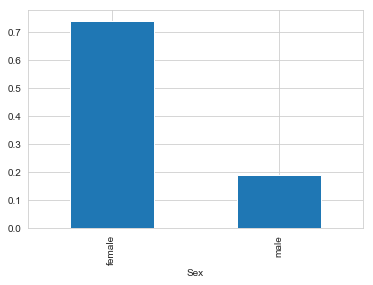

In [242]:
train_df.groupby('Sex').mean()['Survived'].plot(kind='bar')

Age differences seem to breakdown to 4 classes: <br/>
1. ages<10 survived more <br/>
2. 10-20 survived less
3. 20-30 survived way less
4. 30+ survives less 

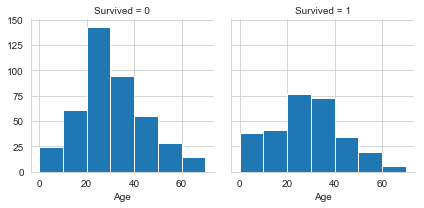

In [243]:
bins=range(0,80,10)
g = sns.FacetGrid(data=train_df,col='Survived')
g = g.map(plt.hist, 'Age', bins=bins)

*Passenger class differences:* <br/>
1. Survival rate: very different between the three classes. 1st class passengers much more likely to survive
2. Ages: The higher the class of the passenger, the greater the age
3. Family members: 3rd class passenger much more likely to have come with siblings or spouse. 
4. Fare: Not surprisingly, fair is higher the higher the passenger class

**Decisions:** <br/>
1. Add Pclass in to model training

In [244]:
train_df.groupby('Pclass').mean().iloc[:,1:6]

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Text(0,0.5,'Survival')

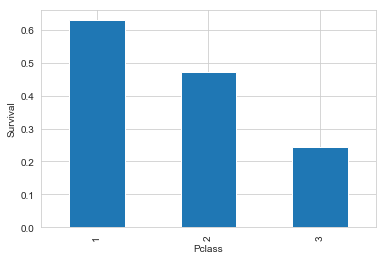

In [245]:
train_df.groupby('Pclass').mean()['Survived'].plot(kind='bar')
plt.ylabel('Survival')

Text(0,0.5,'Age')

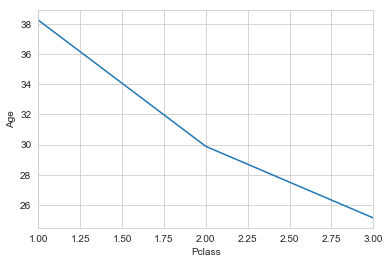

In [246]:
train_df.groupby('Pclass').mean()['Age'].plot(kind='line')
plt.ylabel('Age')

*Cabin vs Passenger Class: *<br/>

More 1st class passengers have a cabin although some 2nd and 3rd class also have cabins. <br/>
People with a cabin seem to survive more. But we don't have enough values to include this in our model. Only 204 values are available. 

**Decisions: ** <br/>
1. Delete cabin category from training and test data. 

In [247]:
# converting cabin to 0 or 1
train_df['Cabin'].fillna(value=0, inplace=True)
cabin_nz = train_df['Cabin'][train_df['Cabin']!=0]
train_df['Cabin'].replace(to_replace=cabin_nz, value=1, inplace=True)

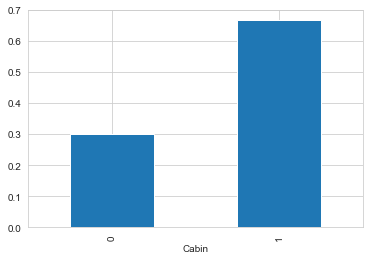

In [248]:
train_df.groupby('Cabin').mean()['Survived'].plot(kind='bar')

C:\Users\d72431\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


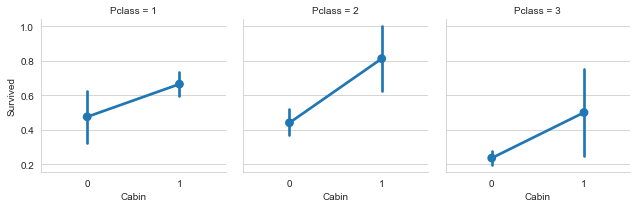

In [249]:
g = sns.FacetGrid(data=train_df, col='Pclass')
g.map(sns.pointplot,'Cabin','Survived',bins= 20)

*Embarked differences:* <br/>

Cherbourg embarked passengers more likely to survive.<br/>
Cherbourg embarked males more likely to survive than women. <br/>

** Decisions: **
1. Add Embarked to model training
2. Complete Embarked data for training data

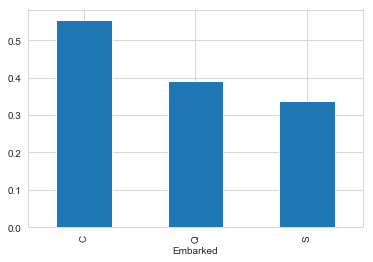

In [250]:
train_df.groupby('Embarked').mean()['Survived'].plot(kind='bar')

C:\Users\d72431\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\d72431\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


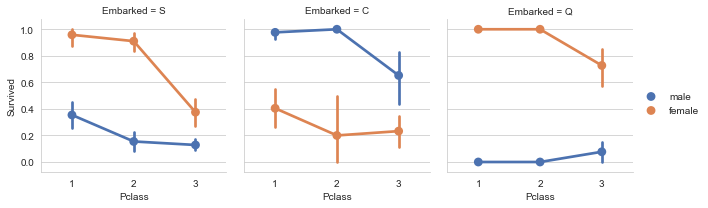

In [251]:
g = sns.FacetGrid(data=train_df, col='Embarked')
g.map(sns.pointplot,'Pclass','Survived', 'Sex', palette='deep')
g.add_legend()

*Fare differences: * <br/>
1. Higher fare, higher survival rate. <br/>
2. Most tickets between 0-10. 
3. Some tickets upto 500. 

** Decisions: ** <br/> 
1. Add Fare to model training. 
2. Normanalize fares / break up into classes 

Text(0,0.5,'Fare')

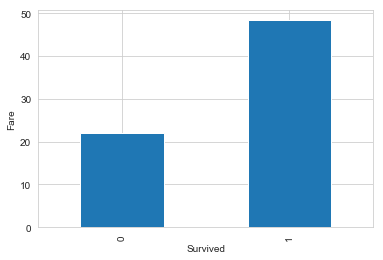

In [252]:
train_df.groupby('Survived').mean()['Fare'].plot(kind='bar')
plt.ylabel('Fare')

Text(0.5,0,'Fare')

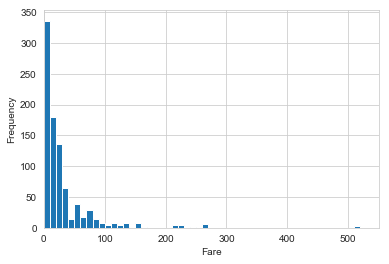

In [253]:
bins=range(0,550,10)
train_df['Fare'].plot(kind='hist', bins=bins)
plt.xlim(0,550)
plt.xlabel ('Fare')

## Data Wrangling <br/>

Correcting: Dropping Cabin and Ticket columns

In [254]:
train_df.drop(labels=['Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(labels=['Ticket', 'Cabin'], axis=1, inplace=True)
combine=[train_df, test_df]


Creating: Creating FamilySize column that adds SibSp and Parch <br/>
Correcting: Deleting SibSp and Parch columns <br/>

FamilySize seems to increase chances of surviving till 3 family members

In [255]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

train_df.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)

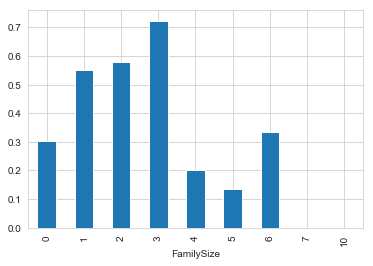

In [256]:
train_df.groupby('FamilySize').mean()['Survived'].plot(kind='bar')

Correcting: Change Sex from category to 1 or 0 for model training

In [257]:
sex_dict = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(sex_dict)
test_df['Sex'] = test_df['Sex'].map(sex_dict)
combine=[train_df, test_df]

Creating: Creating Title from Name column, creating length of characters from Name column <br/>
Correcting: Delete Name column <br/>

Master, Miss, Mrs: high rate of survival <br/>
Mr: low rate of survival <br/>
Rare: between Mr and rest of titles <br/>
Longer character names have greater survival rate <br/>

**Decisions: ** <br/> Let's use title and character length in model

In [258]:
for dataset in combine: 
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Z][a-z]+)\.', expand=False)
    dataset['NameLen'] = dataset['Name'].str.len()
    dataset.drop('Name', axis=1, inplace=True)

Classify less popular titles as 'Rare' category

In [259]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Don           1
Lady          1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [260]:
rare_titles = 'Dr Rev Major Col Jonkheer Don Lady Countess Sir Capt'.split()

for dataset in combine: 
    dataset['Title'].replace(to_replace=rare_titles, value='Rare', inplace=True)
    dataset['Title'].replace(to_replace=['Mlle', 'Ms', 'Mme'], value='Miss', inplace=True)
    dataset.drop('PassengerId', axis=1, inplace=True)

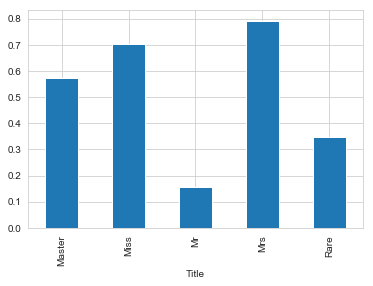

In [261]:
train_df.groupby('Title').mean()['Survived'].plot(kind='bar')

Text(0.5,0,'Characters in Title')

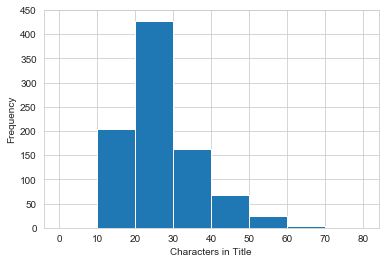

In [262]:
train_df['NameLen'].plot(kind='hist', bins=range(0,90,10))
plt.xlabel('Characters in Title')

Text(0,0.5,'Characters in Title')

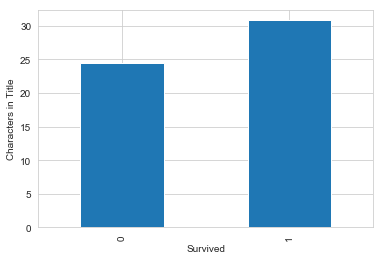

In [263]:
train_df.groupby('Survived').mean()['NameLen'].plot(kind='bar')
plt.ylabel('Characters in Title')

Correcting: Title to numbers for model ingestion

In [264]:
title_mapping = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4}
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping)

Correcting: Embarked ports to numbers for model ingestion

In [265]:
port_dict = {'C' : 0, 'S': 1, 'Q': 2}
for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].map(port_dict)

Completing: train: Filling in missing values for Embarked <br/>
Completing: test: Filling in some missing values

In [266]:
train_df.Embarked.fillna(value=train_df['Embarked'].mode()[0], inplace=True)
test_df.Title.fillna(value=test_df['Title'].mode()[0], inplace=True)
test_df.Fare.fillna(value=test_df['Title'].median(), inplace=True)

Completing: Filling in Age values

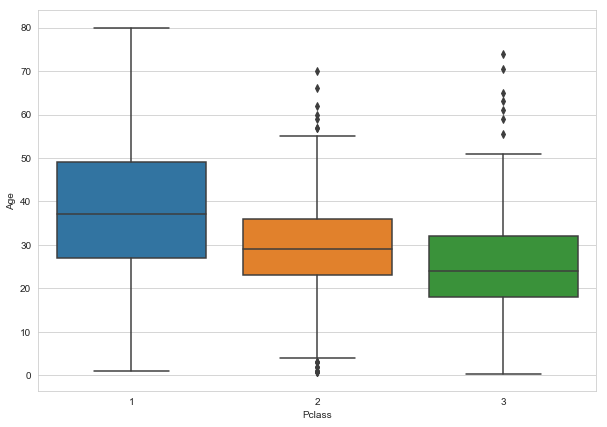

In [267]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.boxplot(data=train_df, x='Pclass', y='Age')

Completing: Using Pclass age averages to impute missing date

In [268]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isna(Age): 
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [269]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)
test_df['Age'] = test_df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [270]:
#PassClass = pd.get_dummies(train_df['Pclass'], drop_first=True )
#Embark = pd.get_dummies(train_df['Embarked'],drop_first=True)
#train_df = pd.concat([train_df, PassClass, Embark], axis=1 )
#train_df.drop(['Pclass', 'Embarked'], axis=1, inplace=True)

In [271]:
train_df.info(), print('----'*20), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null float64
FamilySize    891 non-null int64
Title         891 non-null int64
NameLen       891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
Title         418 non-null float64
NameLen       418 non-null int64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


(None, None, None)

Modeling: Logarithmic model

In [272]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
lg = LogisticRegression()

In [275]:
lg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [276]:
predictions = lg.predict(X_test)

Submission file creation

In [281]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission['Survived'] = predictions
gender_submission.drop(columns='Unnamed: 0', axis=1, inplace=True)
gender_submission.to_csv('gender_submission.csv', index=False)

In [282]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
